# CS50 Final Project: Active vs Passive Investing

# 1. Preparation

### a. Importing relevant libraries

In [50]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


### b. Setting time periods

In [51]:
start = datetime.datetime(2007,1,1)
end = datetime.date.today()

# 2. Data

In [52]:
apple = web.DataReader("AAPL","yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
facebook = web.DataReader("FB", "yahoo", start, end)
amazon = web.DataReader("AMZN", "yahoo", start, end)

In [56]:
ibm = web.DataReader("IBM", "yahoo", start, end)
nintendo = web.DataReader("NTDOY", "yahoo", start, end)
twitter = web.DataReader("TWTR", "yahoo", start, end)
netflix = web.DataReader("NFLX", "yahoo", start, end)

In [57]:
hp = web.DataReader("HPQ", "yahoo", start, end)
sony = web.DataReader("SNY", "yahoo", start, end)
microsoft = web.DataReader("MSFT", "yahoo", start, end)
tesla = web.DataReader("TSLA","yahoo", start, end)

# 3. Explore

### a. Data concatenation

In [58]:
stocks_name = ['Apple','Google','Facebook','Amazon','IBM','Nintendo','Twitter','Netflix','HP','Sony','Microsoft','Tesla']

In [59]:
stocks = pd.concat([apple,google,facebook,amazon,ibm,nintendo,twitter,netflix,hp,sony,microsoft,tesla],axis=1,keys=stocks_name)

In [60]:
stocks.columns.names = ['Stock Name','Stock Info']

In [61]:
stocks.head()

Stock Name      Apple                                                         \
Stock Info       Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2007-01-03  12.327143  12.368571  11.700000  11.971429  10.770167  309579900   
2007-01-04  12.007143  12.278571  11.974286  12.237143  11.009220  211815100   
2007-01-05  12.252857  12.314285  12.057143  12.150000  10.930819  208685400   
2007-01-08  12.280000  12.361428  12.182858  12.210000  10.984798  199276700   
2007-01-09  12.350000  13.282857  12.164286  13.224286  11.897308  837324600   

Stock Name      Google                                      ...    Microsoft  \
Stock Info        Open        High         Low       Close  ...          Low   
Date                                                        ...                
2007-01-03  231.494354  236.789917  229.065155  232.284210  ...    29.400000   
2007-01-04  232.984665  240.411362  232.661758  240.068588  ...    29.440001   
2007-01-05  239.691040  242.174881  237.510223  242.020889  ...    29.450001   
2007-01-08  242.269272  243.352234  239.542007  240.227554  ...    29.530001   
2007-01-09  241.156509  242.547470  239.045242  241.181351  ...    29.730000   

Stock Name                                 Tesla                           \
Stock Info      Close  Adj Close    Volume  Open High Low Close Adj Close   
Date                                                                        
2007-01-03  29.860001  23.080967  76935100   NaN  NaN NaN   NaN       NaN   
2007-01-04  29.809999  23.042315  45774500   NaN  NaN NaN   NaN       NaN   
2007-01-05  29.639999  22.910908  44607200   NaN  NaN NaN   NaN       NaN   
2007-01-08  29.930000  23.135077  50220200   NaN  NaN NaN   NaN       NaN   
2007-01-09  29.959999  23.158260  44636600   NaN  NaN NaN   NaN       NaN   

Stock Name         
Stock Info Volume  
Date               
2007-01-03    NaN  
2007-01-04    NaN  
2007-01-05    NaN  
2007-01-08    NaN  
2007-01-09    NaN  

[5 rows x 72 columns]

### b. Stock returns

** Returns are typically defined by: **

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [62]:
stock_returns = pd.DataFrame() #empty DataFrame

In [63]:
for stock in stocks_name:
    stock_returns[stock + ' Return'] = stocks[stock]['Adj Close'].pct_change()

stock_returns.tail()

,Apple Return,Google Return,Facebook Return,Amazon Return,IBM Return,Nintendo Return,Twitter Return,Netflix Return,HP Return,Sony Return,Microsoft Return,Tesla Return
Date,,,,,,,,,,,,
2017-11-02,0.007310,0.000078,-0.020475,-0.008571,-0.004415,-0.006316,-0.043668,0.006667,-0.001397,-0.005594,0.010459,-0.067958
2017-11-03,0.026114,0.006728,0.000000,0.015883,-0.011542,0.000424,0.009640,0.003462,0.001399,-0.010385,0.001071,0.022823
2017-11-06,0.010145,-0.006373,0.006986,0.008150,-0.004882,-0.009106,-0.025628,0.000600,-0.001397,0.007215,0.003922,-0.010814
2017-11-07,0.003214,0.007242,0.000444,0.002240,0.003381,0.002565,0.013925,-0.021186,-0.002799,-0.010636,-0.002368,0.010800
2017-11-08,0.001716,-0.000068,-0.002441,0.000926,-0.004229,0.017693,-0.010173,-0.001634,-0.000935,0.008556,-0.003560,-0.013437


### c. Adjusted close price graph

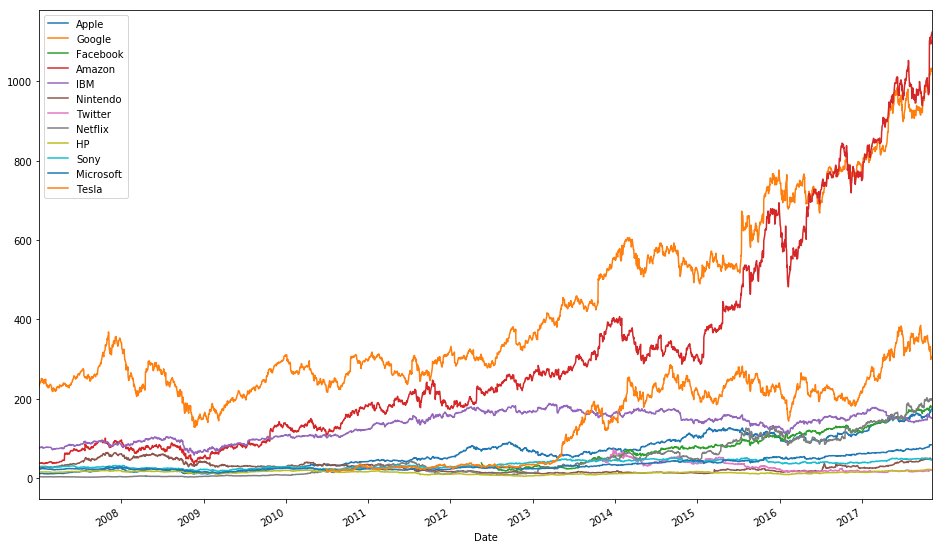

In [64]:
for stock in stocks_name:
    stocks[stock]['Adj Close'].plot(figsize=(16,10),label=stock)
plt.legend()

### d. Correlation heatmap

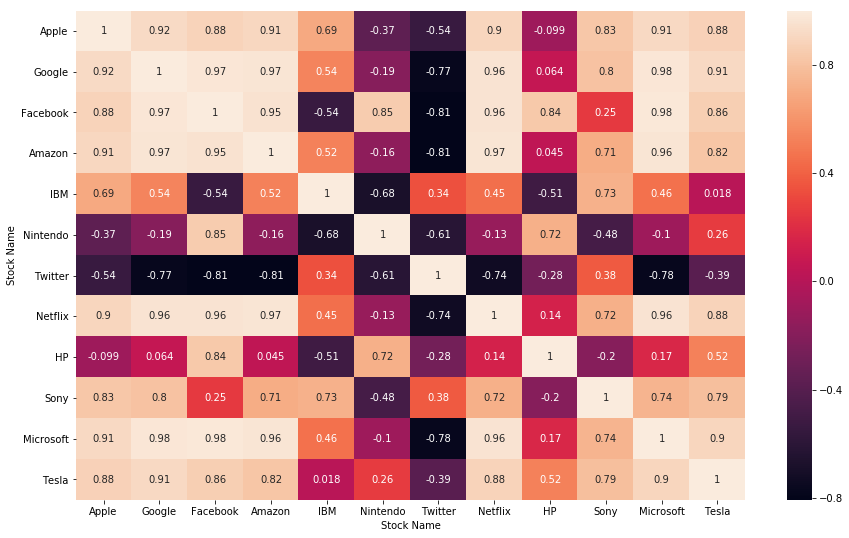

In [65]:
sns.heatmap(stocks.xs(key='Adj Close',axis=1,level='Stock Info').corr(),annot=True)

# 4. Model

### a. Adjusting stock data for splits, dividends, etc.

In [66]:
def stock_adj(data):
    return pd.DataFrame({"Open": data["Open"] * data["Adj Close"] / data["Close"],
                       "High": data["High"] * data["Adj Close"] / data["Close"],
                       "Low": data["Low"] * data["Adj Close"] / data["Close"],
                       "Close": data["Adj Close"]})

In [67]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-02,166.600006,168.500000,165.279999,168.110001,168.110001,41393400
2017-11-03,174.000000,174.259995,171.119995,172.500000,172.500000,59398600
2017-11-06,172.369995,174.990005,171.720001,174.250000,174.250000,35026300
2017-11-07,173.910004,175.250000,173.600006,174.809998,174.809998,24120700
2017-11-08,174.660004,175.240005,174.330002,175.110001,175.110001,6600045


In [68]:
apple_adj = stock_adj(apple)
apple_adj.tail()

,Close,High,Low,Open
Date,,,,
2017-11-02,168.110001,168.500000,165.279999,166.600006
2017-11-03,172.500000,174.259995,171.119995,174.000000
2017-11-06,174.250000,174.990005,171.720001,172.369995
2017-11-07,174.809998,175.250000,173.600006,173.910004
2017-11-08,175.110001,175.240005,174.330002,174.660004


### b. MA crossover strategy function

In [69]:
def ma_crossover_orders(stocks, fast, slow):
    # Creating column name
    fast_str = str(fast) + 'd'
    slow_str = str(slow) + 'd'
    ma_diff_str = fast_str + '-' + slow_str
 
    # Empty DataFrame for future inputs
    trades = pd.DataFrame({"Price": [], "Regime": [], "Signal": []})
    
    # Creating MA, Regime and Signals
    for s in stocks:
        # calculating fast MA (shorter time period)
        # s[1] refering to the stock_adj(s), s[0] refers to the corresponding stock name
        s[1][fast_str] = np.round(s[1]["Close"].rolling(window = fast, center = False).mean(), 2)
        
        # calculating slow MA (longer time period)
        s[1][slow_str] = np.round(s[1]["Close"].rolling(window = slow, center = False).mean(), 2)
        
        # calculating difference between fast and slow MA
        s[1][ma_diff_str] = s[1][fast_str] - s[1][slow_str]
 
        # np.where() is a vectorized if-else function. If the difference in MAs is positive, Regime takes on the value 1, signalling a bullish buy signal
        s[1]["Regime"] = np.where(s[1][ma_diff_str] > 0, 1, 0)
        
        # I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is s[1]["Regime"] from previous line
        s[1]["Regime"] = np.where(s[1][ma_diff_str] < 0, -1, s[1]["Regime"])
        
        # To make sure all the trades close out, I temporarily change the regime of the last row to 0 to compute data for the Signal column
        # selecting the last regime value for s and assign it to regime_orig
        regime_orig = s[1].ix[-1, "Regime"]
        
        # setting the last regime value to 0
        s[1].ix[-1, "Regime"] = 0
        
        # computing values/data for the Signal column
        s[1]["Signal"] = np.sign(s[1]["Regime"] - s[1]["Regime"].shift(1))
        
        # Restore original regime data
        s[1].ix[-1, "Regime"] = regime_orig
 
        # Get signals
        signals = pd.concat([
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == 1, "Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == 1, "Regime"],
                         "Signal": "Buy"}),
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == -1, "Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == -1, "Regime"],
                         "Signal": "Sell"}),
        ])
        signals.index = pd.MultiIndex.from_product([signals.index, [s[0]]], names = ["Date", "Symbol"])
        trades = trades.append(signals)
 
    trades.sort_index(inplace = True)
    trades.index = pd.MultiIndex.from_tuples(trades.index, names = ["Date", "Symbol"])
 
    return trades

### c. Referencing the code for Backtesting

In [70]:
def backtest(signals, cash, port_value = .1, batch = 100):
    """
    :param signals: pandas DataFrame containing buy and sell signals with stock prices and symbols, like that returned by ma_crossover_orders
    :param cash: integer for starting cash value
    :param port_value: maximum proportion of portfolio to risk on any single trade
    :param batch: Trading batch sizes
 
    :return: pandas DataFrame with backtesting results
 
    This function backtests strategies, with the signals generated by the strategies being passed in the signals DataFrame. A fictitious portfolio is simulated and the returns generated by this portfolio are reported.
    """
    SYMBOL = 1 # Constant for which element in index represents symbol
    portfolio = dict()    # Will contain how many stocks are in the portfolio for a given symbol
    port_prices = dict()  # Tracks old trade prices for determining profits
    # Dataframe that will contain backtesting report
    results = pd.DataFrame({"Start Cash": [],
                            "End Cash": [],
                            "Portfolio Value": [],
                            "Type": [],
                            "Shares": [],
                            "Share Price": [],
                            "Trade Value": [],
                            "Profit per Share": [],
                            "Total Profit": []})
 
    for index, row in signals.iterrows():
        # These first few lines are done for any trade
        shares = portfolio.setdefault(index[SYMBOL], 0)
        trade_val = 0
        batches = 0
        cash_change = row["Price"] * shares   # Shares could potentially be a positive or negative number (cash_change will be added in the end; negative shares indicate a short)
        portfolio[index[SYMBOL]] = 0  # For a given symbol, a position is effectively cleared
 
        old_price = port_prices.setdefault(index[SYMBOL], row["Price"])
        portfolio_val = 0
        for key, val in portfolio.items():
            portfolio_val += val * port_prices[key]
 
        if row["Signal"] == "Buy" and row["Regime"] == 1:  # Entering a long position
            batches = np.floor((portfolio_val + cash) * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
            trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
            cash_change -= trade_val  # We are buying shares so cash will go down
            portfolio[index[SYMBOL]] = batches * batch  # Recording how many shares are currently invested in the stock
            port_prices[index[SYMBOL]] = row["Price"]   # Record price
            old_price = row["Price"]
        elif row["Signal"] == "Sell" and row["Regime"] == -1: # Entering a short
            pass
            # Do nothing; can we provide a method for shorting the market?
        #else:
            #raise ValueError("I don't know what to do with signal " + row["Signal"])
 
        pprofit = row["Price"] - old_price   # Compute profit per share; old_price is set in such a way that entering a position results in a profit of zero
 
        # Update report
        results = results.append(pd.DataFrame({
                "Start Cash": cash,
                "End Cash": cash + cash_change,
                "Portfolio Value": cash + cash_change + portfolio_val + trade_val,
                "Type": row["Signal"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": abs(cash_change),
                "Profit per Share": pprofit,
                "Total Profit": batches * batch * pprofit
            }, index = [index]))
        cash += cash_change  # Final change to cash balance
 
    results.sort_index(inplace = True)
    results.index = pd.MultiIndex.from_tuples(results.index, names = ["Date", "Symbol"])
 
    return results

### d. Results - Backtesting £1,000,000

In [71]:
trade_signals = ma_crossover_orders([("AAPL", stock_adj(apple)),
                                   ("MSFT",stock_adj(microsoft)),
                                   ("TSLA",stock_adj(tesla)),
                                   ("GOOG",stock_adj(google)),
                                   ("FB",stock_adj(facebook)),
                                   ("TWTR",stock_adj(twitter)),
                                   ("NFLX",stock_adj(netflix)),
                                   ("AMZN",stock_adj(amazon)),
                                   ("SNY",stock_adj(sony)),
                                   ("NTDOY",stock_adj(nintendo)),
                                   ("IBM",stock_adj(ibm)),
                                   ("HPQ",stock_adj(hp))],
                                   fast = 20, slow = 50)
trade_signals

/Users/ryanong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Price  Regime Signal
Date       Symbol                            
2007-03-15 AAPL      11.511741    -1.0   Sell
           AMZN      37.779999     1.0    Buy
           GOOG     221.653366    -1.0   Sell
           HPQ       14.483060    -1.0   Sell
           IBM       73.411667    -1.0   Sell
           MSFT      21.159813    -1.0   Sell
           NFLX       3.022857    -1.0   Sell
           NTDOY     28.479753     1.0    Buy
           SNY       26.968479    -1.0   Sell
2007-03-16 AAPL      11.514311     1.0    Buy
2007-03-26 AMZN      39.009998    -1.0   Sell
2007-03-30 AMZN      39.790001     0.0    Buy
2007-04-02 AMZN      40.419998     1.0    Buy
2007-04-09 NFLX       3.477143     1.0    Buy
2007-04-13 GOOG     231.638412     1.0    Buy
           SNY       29.414309     1.0    Buy
2007-04-18 HPQ       14.950021     1.0    Buy
2007-04-20 MSFT      22.509445     1.0    Buy
2007-04-23 IBM       74.794273     1.0    Buy
2007-05-09 NFLX       3.158571    -1.0   Sell
2007-06-20 SNY       26.914167    -1.0   Sell
2007-06-27 MSFT      23.243805    -1.0   Sell
2007-08-08 MSFT      23.344969     1.0    Buy
2007-08-09 MSFT      22.800245     0.0   Sell
2007-08-10 GOOG     256.208618    -1.0   Sell
           MSFT      22.341129    -1.0   Sell
2007-08-23 AAPL      16.845413    -1.0   Sell
2007-09-17 AAPL      17.788773     1.0    Buy
2007-09-19 GOOG     271.658112     1.0    Buy
2007-09-20 NFLX       2.782857     0.0    Buy
...                        ...     ...    ...
2017-07-21 TSLA     328.399994    -1.0   Sell
2017-07-24 IBM      144.463654    -1.0   Sell
2017-07-26 HPQ       19.127413     0.0    Buy
2017-07-27 HPQ       19.077757     1.0    Buy
2017-08-02 AAPL     156.525330     1.0    Buy
2017-08-11 TWTR      15.920000    -1.0   Sell
2017-08-21 AMZN     953.289978    -1.0   Sell
2017-08-23 TSLA     352.769989     1.0    Buy
2017-08-30 SNY       48.189999     1.0    Buy
2017-09-22 IBM      145.130005     1.0    Buy
           TWTR      17.610001     0.0    Buy
2017-09-25 TWTR      16.980000     1.0    Buy
2017-09-28 GOOG     949.500000     1.0    Buy
2017-10-02 AAPL     153.809998    -1.0   Sell
2017-10-13 TSLA     355.570007    -1.0   Sell
2017-10-16 AMZN    1006.340027     1.0    Buy
2017-11-01 AAPL     166.889999     1.0    Buy
           SNY       46.480000    -1.0   Sell
2017-11-08 AAPL     175.110001     1.0   Sell
           AMZN    1124.209961     1.0   Sell
           FB       179.809998     1.0   Sell
           GOOG    1033.260010     1.0   Sell
           HPQ       21.360001     1.0   Sell
           IBM      150.710007     1.0   Sell
           MSFT      83.970001     1.0   Sell
           NFLX     195.570007     1.0   Sell
           NTDOY     47.740002     1.0   Sell
           SNY       45.970001    -1.0    Buy
           TSLA     301.937500    -1.0    Buy
           TWTR      19.459999     1.0   Sell

[699 rows x 3 columns]

In [72]:
backtest_portfolio = backtest(trade_signals, 1000000)
backtest_portfolio

End Cash  Portfolio Value  Profit per Share  \
Date       Symbol                                                    
2007-03-15 AAPL    1.000000e+06     1.000000e+06          0.000000   
           AMZN    9.017720e+05     1.000000e+06          0.000000   
           GOOG    9.017720e+05     1.000000e+06          0.000000   
           HPQ     9.017720e+05     1.000000e+06          0.000000   
           IBM     9.017720e+05     1.000000e+06          0.000000   
           MSFT    9.017720e+05     1.000000e+06          0.000000   
           NFLX    9.017720e+05     1.000000e+06          0.000000   
           NTDOY   8.020929e+05     1.000000e+06          0.000000   
           SNY     8.020929e+05     1.000000e+06          0.000000   
2007-03-16 AAPL    7.030698e+05     1.000000e+06          0.000000   
2007-03-26 AMZN    8.044958e+05     1.003198e+06          1.229999   
2007-03-30 AMZN    8.044958e+05     1.003198e+06          2.010002   
2007-04-02 AMZN    7.074878e+05     1.003198e+06          0.000000   
2007-04-09 NFLX    6.073461e+05     1.003198e+06          0.000000   
2007-04-13 GOOG    5.146907e+05     1.003198e+06          0.000000   
           SNY     4.146821e+05     1.003198e+06          0.000000   
2007-04-18 HPQ     3.145169e+05     1.003198e+06          0.000000   
2007-04-20 MSFT    2.154754e+05     1.003198e+06          0.000000   
2007-04-23 IBM     1.182428e+05     1.003198e+06          0.000000   
2007-05-09 NFLX    2.092096e+05     9.940231e+05         -0.318572   
2007-06-20 SNY     3.007178e+05     9.855226e+05         -2.500142   
2007-06-27 MSFT    4.029906e+05     9.887538e+05          0.734360   
2007-08-08 MSFT    3.049417e+05     9.887538e+05          0.000000   
2007-08-09 MSFT    4.007027e+05     9.864660e+05         -0.544724   
2007-08-10 GOOG    5.031862e+05     9.962941e+05         24.570206   
           MSFT    5.031862e+05     9.962941e+05         -1.003840   
2007-08-23 AAPL    6.480567e+05     1.042142e+06          5.331102   
2007-09-17 AAPL    5.448818e+05     1.042142e+06          0.000000   
2007-09-19 GOOG    4.633844e+05     1.042142e+06          0.000000   
2007-09-20 NFLX    4.633844e+05     1.042142e+06         -0.694286   
...                         ...              ...               ...   
2017-07-21 TSLA    1.513223e+06     4.032935e+06         50.100006   
2017-07-24 IBM     1.874382e+06     4.009210e+06         -9.489746   
2017-07-26 HPQ     1.874382e+06     4.009210e+06          3.418494   
2017-07-27 HPQ     1.473749e+06     4.009210e+06          0.000000   
2017-08-02 AAPL    1.082435e+06     4.009210e+06          0.000000   
2017-08-11 TWTR    1.399243e+06     3.929212e+06         -4.020001   
2017-08-21 AMZN    1.780559e+06     3.991760e+06        156.369995   
2017-08-23 TSLA    1.392512e+06     3.991760e+06          0.000000   
2017-08-30 SNY     9.973545e+05     3.991760e+06          0.000000   
2017-09-22 IBM     6.055035e+05     3.991760e+06          0.000000   
           TWTR    6.055035e+05     3.991760e+06         -2.330000   
2017-09-25 TWTR    2.064735e+05     3.991760e+06          0.000000   
2017-09-28 GOOG   -1.733265e+05     3.991760e+06          0.000000   
2017-10-02 AAPL    2.111985e+05     3.984972e+06         -2.715332   
2017-10-13 TSLA    6.023255e+05     3.988052e+06          2.800018   
2017-10-16 AMZN    3.004235e+05     3.988052e+06          0.000000   
2017-11-01 AAPL   -8.342352e+04     3.988052e+06          0.000000   
           SNY     2.977125e+05     3.974030e+06         -1.709999   
2017-11-08 AAPL    7.004655e+05     3.992936e+06          8.220002   
           AMZN    1.037728e+06     4.028297e+06        117.869934   
           FB      1.523215e+06     4.171910e+06         53.189995   
           GOOG    1.936519e+06     4.205414e+06         83.760010   
           HPQ     2.385079e+06     4.253341e+06          2.282244   
           IBM     2.791997e+06     4.268407e+06          5.580002   
           MSFT    3.279023e+06  

### e. Benchmarking

In [73]:
spyder = web.DataReader("SPY", "yahoo", start, end)

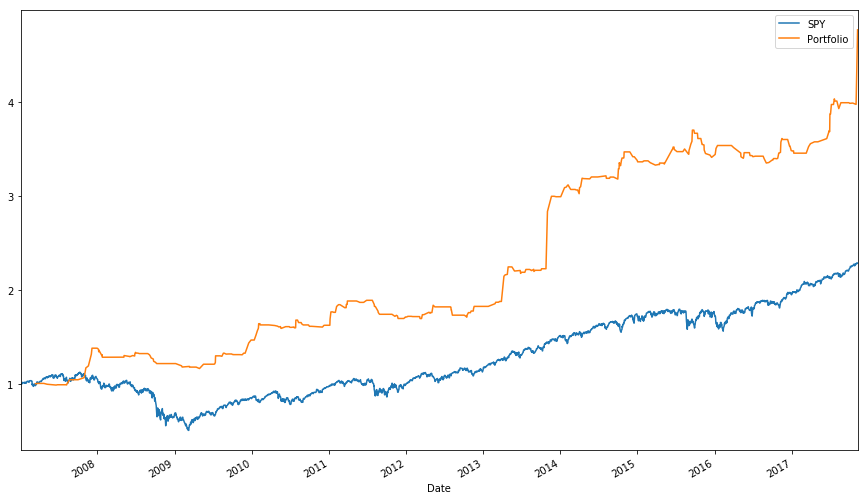

In [76]:
ax_bench = (spyder["Adj Close"] / spyder.ix[0, "Adj Close"]).plot(label = "SPY")
ax_bench = (backtest_portfolio["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]) / 1000000).plot(ax = ax_bench, label = "Portfolio")
ax_bench.legend(ax_bench.get_lines(), [l.get_label() for l in ax_bench.get_lines()], loc = 'best')